In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
import warnings
warnings.filterwarnings('ignore')
from matplotlib import cm
import cmath as cm
from scipy.linalg import eigh
from scipy.integrate import trapezoid
from scipy.misc import derivative
from scipy.optimize import curve_fit

# Q.1

## Constants

In [2]:
T = 23 + 273.15
me = 9.1093837*10**(-31) # kg
k = 1.380649*10**(-23) # m^2 kg s^-2 K^-1
hbar = 1.054571817*10**(-34) # J s
Nc = 2*(me*k*T/(2*np.pi*hbar))**(1.5)
Efc1 = -100*10**(-3)*1.6*10**(-19) # J
Efc2 = 50*10**(-3)*1.6*10**(-19) # J
etaf1 = Efc1/k*T
etaf2 = Efc2/k*T

## Carrier concentration functions

In [3]:
def FDintegrand(eta, etaf):
    return np.sqrt(eta)/(1+np.exp(eta - etaf))

def BAintegrand(eta, etaf):
    return np.exp(etaf - eta)

def FDn(etaf): # Fermi-Dirac distribution
    I = quad(FDintegrand, 0, np.inf, args=(etaf))
    F12 = I[0]
    return 2/np.sqrt(np.pi)*Nc*F12

def BAn(etaf): # Boltzmann approximation
    I = quad(BAintegrand, 0, np.inf, args=(etaf))
    F12 = I[0]
    return 2/np.sqrt(np.pi)*Nc*F12

## Values to plot

In [4]:
Efcvals = np.linspace(-200,-100,100) # meV
etafvals = Efcvals*10**(-3)*1.6*10**(-19)/(k*T) # Dimensionless
FD = []
BA = []
for n in etafvals:
    g = FDn(n)
    r = BAn(n)
    FD = np.append(FD, g)
    BA = np.append(BA, r)

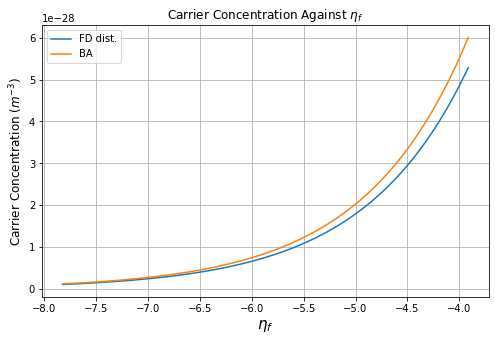

Here we consider the range of Ec-Ef between -200.0 meV and -100.0 meV


In [5]:
fig = plt.figure(figsize = (8,5))

plt.title(r'Carrier Concentration Against $\eta_f$')
plt.plot(etafvals, FD, label = 'FD dist.')
plt.plot(etafvals, BA, label = 'BA')
plt.xlabel(r'$\eta_f$', fontsize = 15)
plt.ylabel(r'Carrier Concentration ($m^{-3}$)', fontsize = 12)
plt.legend()
plt.grid()
plt.show()

print('Here we consider the range of Ec-Ef between', Efcvals[0], 'meV and', Efcvals[-1],'meV')

## Numerical values

In [6]:
FDn1 = FDn(-100/(k*T))
FDn2 = FDn(50/(k*T))
BAn1 = BAn(-100/(k*T))
BAn2 = BAn(50/(k*T))
print('The concentration of electrons for Ec - Ef = -100 meV is', FDn1, 'using the FD dist. and', BAn1, 'using the BA while for Ec - Ef = 50 meV it is', FDn2,
      'using the FD dist. and', BAn2, 'using the BA. This shows that the BA is good when ηf < 0')

The concentration of electrons for Ec - Ef = -100 meV is 0.0 using the FD dist. and 0.0 using the BA while for Ec - Ef = 50 meV it is 7.294893236149837e-12 using the FD dist. and inf using the BA. This shows that the BA is good when ηf < 0


# Q.3

## Constants

In [35]:
Taup = 10**(-6) # s
up = 300*10**(-4) # m^2 V^-1 s^-1
e = 1.6*10**(-19) # C
E0 = 100 # V m^−1
T0 = 298 # K

## Function

In [132]:
def solve_pstar(x_min = 0, x_max = 4*10**(-5), t_min = 0, t_max = 4*10**(-5), steps=100, p_args=[]):
    dx = (x_max-x_min)/steps
    X = np.arange(x_min, x_max, dx)

    dt = (t_max-t_min)/steps
    Times = np.arange(t_min, t_max, dt)

    xfst_der = (np.diag(np.ones(steps-1),1) - np.diag(np.ones(steps-1),-1))/(2*dx)

    xscnd_der = (-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1)\
            +np.diag(np.ones(steps-1),-1))/(dx**2)

    Temp = p_args[0]
    Efield = p_args[1]

    D = up*k*Temp/e # 

    tfst_der = D*xscnd_der - up*Efield*xfst_der
    
    E, V = eigh(tfst_der) # ,subset_by_value=[0, Vm]
    
    return V[0]

In [138]:
steps = 4
dx =1

xfst_der = (np.diag(np.ones(steps-1),1) - np.diag(np.ones(steps-1),-1))/(2*dx)

xscnd_der = (-2.0*np.diag(np.ones(steps))+np.diag(np.ones(steps-1),1)\
            +np.diag(np.ones(steps-1),-1))/(dx**2)

print(xfst_der)
print(xscnd_der)

[[ 0.   0.5  0.   0. ]
 [-0.5  0.   0.5  0. ]
 [ 0.  -0.5  0.   0.5]
 [ 0.   0.  -0.5  0. ]]
[[-2.  1.  0.  0.]
 [ 1. -2.  1.  0.]
 [ 0.  1. -2.  1.]
 [ 0.  0.  1. -2.]]


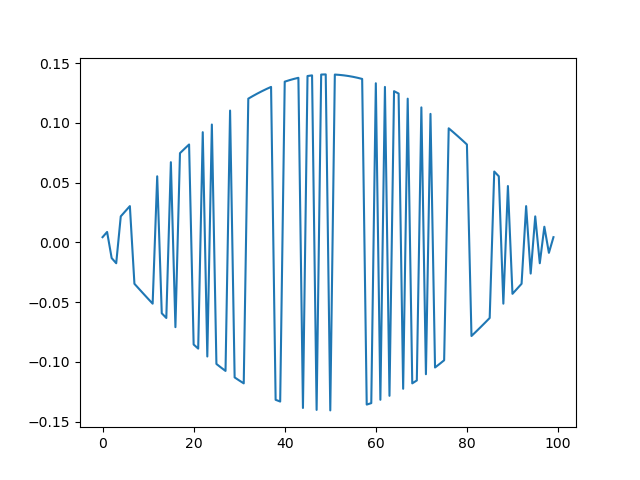

In [135]:
args = [T0, E0]
a = solve_pstar(steps=100, p_args = args)
plt.figure()
plt.plot(a)
plt.show()

## Analytic solution

In [90]:
def an_del_p(x, t, Temp, Efield):
    D = up*k*Temp/e
    prefactor = (np.exp(-t/Taup))/((4*np.pi*D*t)**2)
    exponent = -(x - up*Efield*t)**2/(4*D*t)
    return prefactor*np.exp(exponent)

## Plot

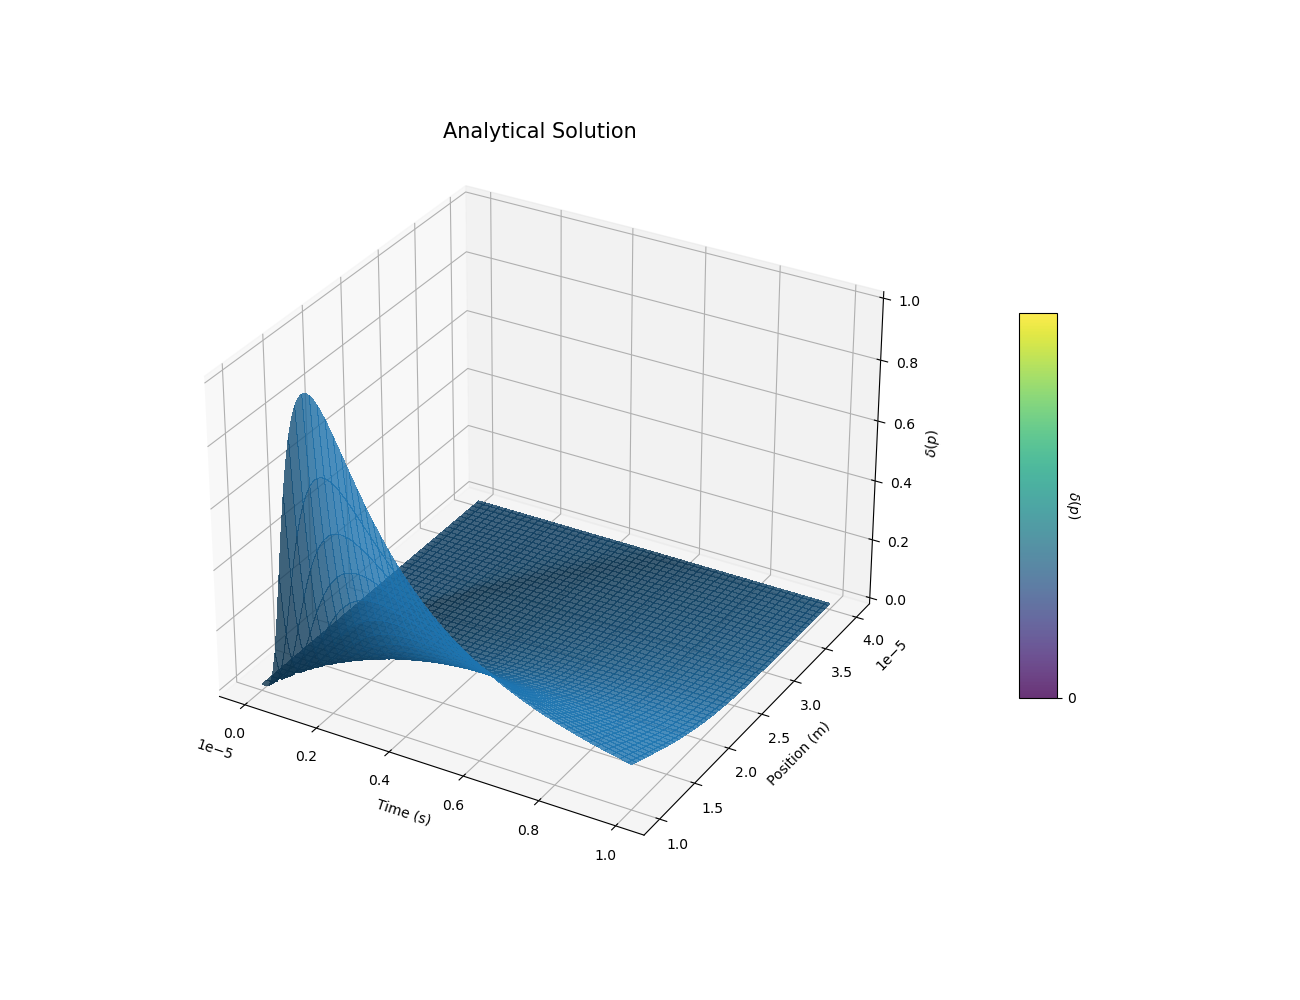

In [107]:
%matplotlib widget

t_val = np.linspace(0.01,10,100)*10**(-6) # s
x_val = np.linspace(1,4,100)*10**(-5) # m
X,Ts = np.meshgrid(x_val,t_val)
andp = an_del_p(X, Ts, T0, E0)
# normandp = andp/(np.max(andp))
# l = int(np.max(andp))
# stepcb = int(l/10)

fig, ax = plt.subplots(figsize = (13,10), subplot_kw={"projection": "3d"})
surf = ax.plot_surface(Ts, X, normandp, alpha=0.8, linewidth=0.01, antialiased=False)

   
# rstride = 2, cstride = 2, 
# ax.set_zlim(np.min([np.min(Egx),np.min(Exm),np.min(Emg)])+0.5, np.max([np.max(Egx),np.max(Exm),np.max(Emg)])-0.5)
ax.set_title('Analytical Solution', fontsize = 15, y = 1.06)
ax.set_zlabel('$\delta (p)$')
ax.set_ylabel('Position (m)')
ax.set_xlabel('Time (s)')

cbar = fig.colorbar(surf, shrink=0.5, aspect=10, pad = 0.1, ticks=range(0, 1, 10))
cbar.set_label('$\delta (p)$', rotation=270, x = 0.1, y = 0.5)

plt.show()